<font size='5px' color='red'/> Early Stopping alg<font/>

<font size='5px' color='blue'/> 1 introduction<font/>

 - The increase in number of layers, and the number of neuron per layer may cause overfitting
 - We will need to be able to dropout some neuron to prevent overfitting
 - You can relate the number of layer in DL to degree of polyn in ML

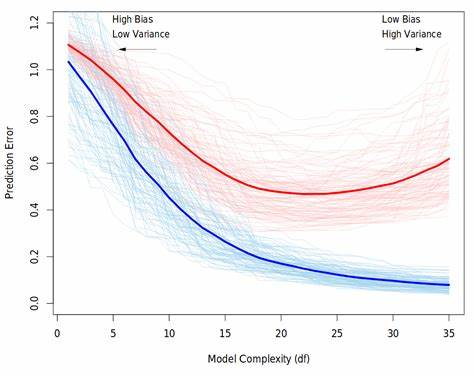

In [16]:
Image('Model Complexity vs Prediction error.jpg')
    # The increase in complexity will increase variance
    # The decrease in complexity will decrease variance

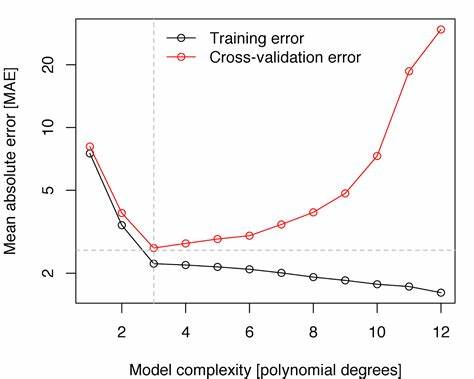

In [17]:
Image('Model Complexity vs Prediction error Poly effect.jpg')

## 1.1 Early Stolpping
   - Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit

## Dropout layers 
   - Dropout can be added to layers (A feature) to "turn off" neurons during training to prevent over fitting
   - Each Dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch (Some neuron will be stopped from training which will give us a new degree of freedom)

<font size='5px' color='red'/> Breast cancer wisconsin example<font/>

<font size='5px' color='blue'/> 1 Libaraies and dataset<font/>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout 

In [5]:
from sklearn.metrics import mean_absolute_error,explained_variance_score,mean_squared_error
from numpy import median

In [6]:
df=pd.read_csv('cancer_classification.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<font size='5px' color='blue'/> 2 Exploratory Data analysis<font/>

## 2.1 Exploratory Data analysis

In [8]:
df.describe().transpose()
    # Tarnspose fun is used to make it easier to read

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

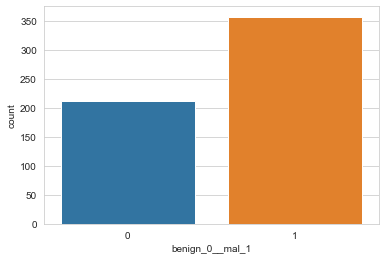

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)
    # We perform it to see if the data is well balanced or not
    # It looks well balanced

## 2.1.1 Missing data check

<AxesSubplot:>

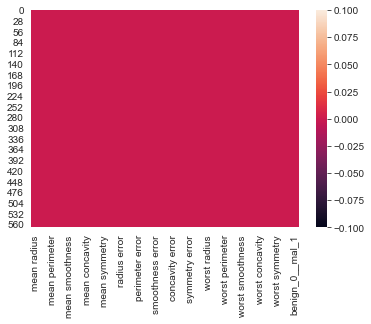

In [10]:
sns.heatmap(df.isnull())

## 2.1.2 correlation

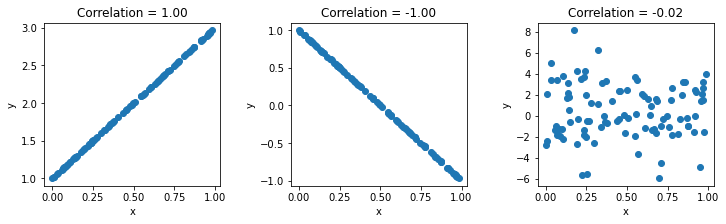

In [11]:
Image('correlation.png')

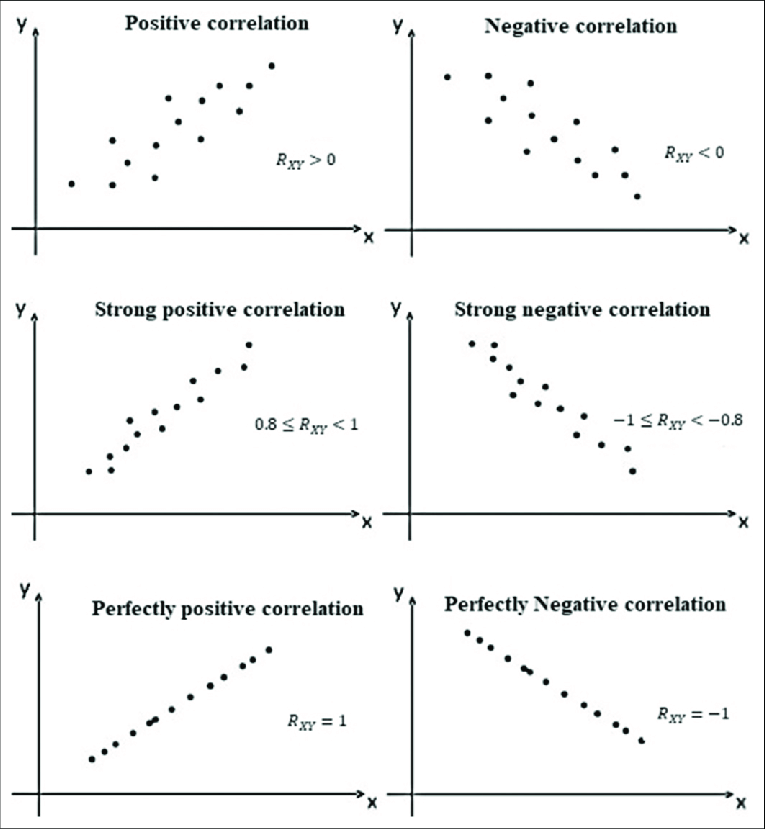

In [12]:
Image('Correlation-classification.png')
    # If in the same plot 
        # Highly negative means that the increase in feature increase the 0 values
        # Highly positive means that the decrease in feature increase the 1 values
        # No correlation means that the values has no effect and the points will be scattered on the 0 and 1 

<AxesSubplot:>

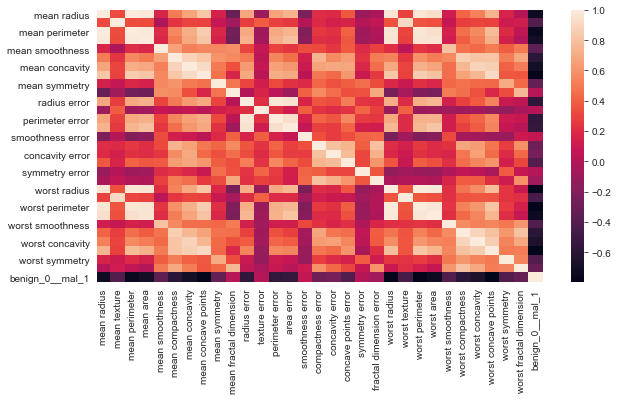

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [14]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)
    # View the correlation with respect to the value we want to predict

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<AxesSubplot:>

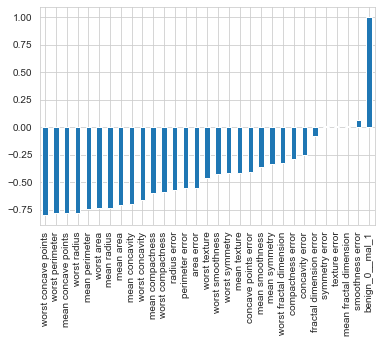

In [15]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

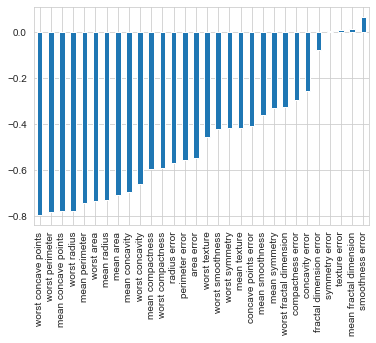

In [16]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
    # Grab everything exept the last column

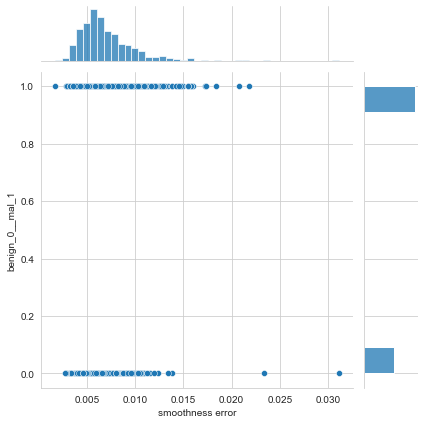

In [17]:
sns.jointplot(x='smoothness error',y='benign_0__mal_1',data=df)
    # Best correlation

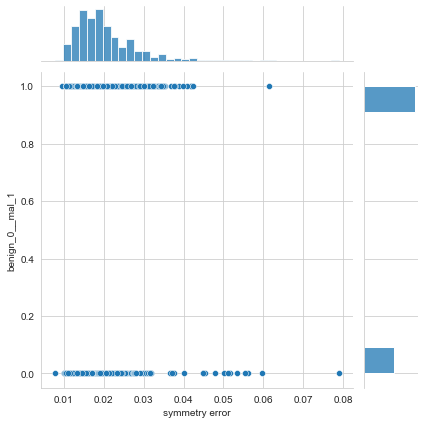

In [18]:
sns.jointplot(x='symmetry error',y='benign_0__mal_1',data=df)
    # Worst correlation

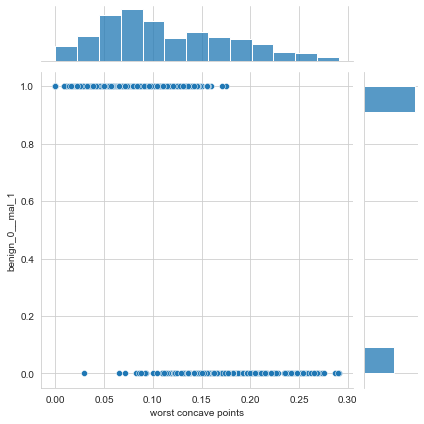

In [19]:
sns.jointplot(x='worst concave points',y='benign_0__mal_1',data=df)
    # Strong negative correlation

## 2.1.3 Sample out outliers

<font size='5px' color='blue'/> 3 Feature Engineering<font/>

## 3.1 Drop unecessery data

## 3.2 Dig new feature

## 3.3 Explore the effect of the new feature

## 3.4 Categorical Feature

<font size='5px' color='blue'/> 4 Preprocessing<font/>

In [8]:
X=df.drop('benign_0__mal_1',axis=1).values

In [9]:
y=df['benign_0__mal_1'].values

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
scaler=MinMaxScaler()

In [12]:
scaler.fit(X_train,y_train)

MinMaxScaler()

In [13]:
X_train=scaler.transform(X_train)

In [14]:
X_test=scaler.transform(X_test)

<font size='5px' color='blue'/> 5 Model Creating<font/>

In [63]:
NN_model=Sequential()
NN_model.add(Dense(30,activation='relu'))
NN_model.add(Dense(15,activation='relu'))
NN_model.add(Dense(1,activation='sigmoid'))
    # We used sigmoid as we are making a Binary classification
    # The lase neuron produces either 1 or 0

In [61]:
X_train.shape

(398, 30)

In [64]:
NN_model.compile(optimizer='adam',loss='binary_crossentropy')

<font size='5px' color='blue'/> 6 Training the model<font/>

In [65]:
NN_model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 14ms/step - loss: 0.6772 - val_loss: 0.6635
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6473 - val_loss: 0.6404
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6206 - val_loss: 0.6146
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5878 - val_loss: 0.5813
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5523 - val_loss: 0.5441
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5138 - val_loss: 0.5044
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4717 - val_loss: 0.4625
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4214 - val_loss: 0.4213
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3830 - val_loss: 0.3816
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3409 - val_loss: 0.3441
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.1439
Epoch 84/600
13/13 [==============================] - ETA: 0s - loss: 0.027 - 0s 3ms/step - loss: 0.0419 - val_loss: 0.1341
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.1368
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.1342
Epoch 87/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.1364
Epoch 88/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.1368
Epoch 89/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - val_loss: 0.1355
Epoch 90/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.1349
Epoch 91/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1359
Epoch 92/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0403 - val_lo

13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.1817
Epoch 246/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.1781
Epoch 247/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.1778
Epoch 248/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.1797
Epoch 249/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.1791
Epoch 250/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1823
Epoch 251/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.1828
Epoch 252/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 0.1827
Epoch 253/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.1816
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.1851
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.3417
Epoch 408/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.3461
Epoch 409/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.3403
Epoch 410/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.3486
Epoch 411/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.3386
Epoch 412/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.3399
Epoch 413/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.3515
Epoch 414/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.3430
Epoch 415/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.3451
Epoch 416/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.3520
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.5974
Epoch 570/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.6021
Epoch 571/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.5966
Epoch 572/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.6027
Epoch 573/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.5998
Epoch 574/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.6068
Epoch 575/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.6079
Epoch 576/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.6052
Epoch 577/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.6066
Epoch 578/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.6132
Epoc

In [66]:
Residual=pd.DataFrame(NN_model.history.history)

<AxesSubplot:>

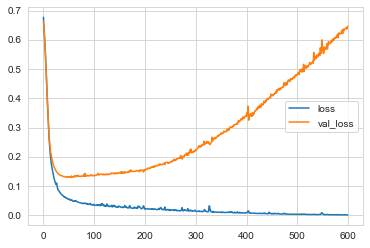

In [67]:
Residual.plot()
    # Here our model is overfitting, as there is a deviation between the validation and training losses

## 6.1 Causes of overfitting
   - You train for so many epochs
   - You have many layers which complex the model

<font size='5px' color='blue'/> 7  Early Stopping<font/>

- You are going to choose a matrix to follow up
    -In our case the matrix will be validation loss
- You can define other many variables like:
     - Patience: to avoid the effect of noise that may cause a false condition reaching
     - mode: What do you want from what you monitor for example:
         - If you are monitoring accuracy for example you want it to be max, 
         - On the other hand, if you are monitoring loss you want it to be min
         - auto will be let the programe choose for you fromk the name

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
help(EarlyStopping) 

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

## 7.1 Steps to Early stopping 

## 7.1.1 Deifine an early stopping variabel

In [16]:
early_stope=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

## 7.1.2 Add early stopping to fit

In [17]:
NN_model=Sequential()
NN_model.add(Dense(30,activation='relu'))
NN_model.add(Dense(15,activation='relu'))
NN_model.add(Dense(1,activation='sigmoid'))

In [18]:
NN_model.compile(optimizer='adam',loss='binary_crossentropy')

In [19]:
NN_model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stope])

Epoch 1/600
13/13 [==============================] - 0s 18ms/step - loss: 0.6905 - val_loss: 0.6720
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6507 - val_loss: 0.6322
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6073 - val_loss: 0.5898
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5650 - val_loss: 0.5517
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5235 - val_loss: 0.5103
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4812 - val_loss: 0.4681
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4385 - val_loss: 0.4262
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3958 - val_loss: 0.3876
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3567 - val_loss: 0.3520
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3224 - val_loss: 0.3205
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.1415
Epoch 00083: early stopping


In [20]:
Residual=pd.DataFrame(NN_model.history.history)

<AxesSubplot:>

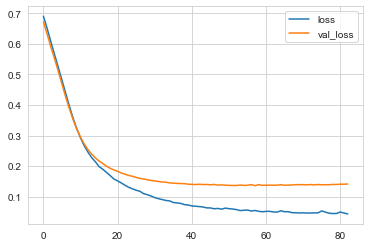

In [21]:
Residual.plot()
    # This what we want, both validation and loss is decreasing,and, at the point where they get seperated we stop the training


<font size='5px' color='blue'/> 8  Dropout layer<font/>

   - It will turn off a random percentage of neurons
   - The main parameter you will need is rate
       - It's the fraction that you are going to randomly turn off
       - The recommende value is between 0.2 or 0.5

In [22]:
from tensorflow.keras.layers import Dropout

In [23]:
NN_model=Sequential()
NN_model.add(Dense(30,activation='relu'))
NN_model.add(Dropout(.5))
NN_model.add(Dense(15,activation='relu'))
NN_model.add(Dropout(.5))
NN_model.add(Dense(1,activation='sigmoid'))

In [24]:
NN_model.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
NN_model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stope])

Epoch 1/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6982 - val_loss: 0.6762
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6801 - val_loss: 0.6641
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6663 - val_loss: 0.6550
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6590 - val_loss: 0.6468
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6539 - val_loss: 0.6368
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6420 - val_loss: 0.6242
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.6106
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6046 - val_loss: 0.5914
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5915 - val_loss: 0.5653
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5716 - val_loss: 0.5419
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.1256
Epoch 84/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1096 - val_loss: 0.1222
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1179 - val_loss: 0.1253
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1156 - val_loss: 0.1244
Epoch 87/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1010 - val_loss: 0.1249
Epoch 88/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1001 - val_loss: 0.1254
Epoch 89/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1166 - val_loss: 0.1226
Epoch 90/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1495 - val_loss: 0.1223
Epoch 91/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1165 - val_loss: 0.1289
Epoch 92/600
13/13 [==============================] - ETA: 0s - loss: 0.091 - 0s 3ms/step - loss: 0.

In [26]:
Residual=pd.DataFrame(NN_model.history.history)

<AxesSubplot:>

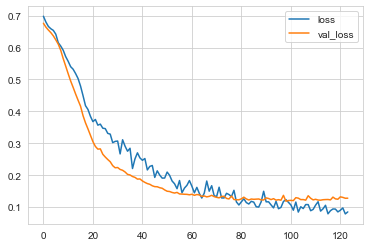

In [27]:
Residual.plot()


<font size='5px' color='blue'/> 9 Prediction<font/>

In [29]:
y_pred=NN_model.predict_classes(X_test)
    # here it will predict classes 

<font size='5px' color='blue'/> 10 Evaluation<font/>

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,y_pred))

[[ 63   3]
 [  2 103]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## 10.1 Visual Evaluation

## 10.2 Numerical Evalutaion

## 10.3 Evaluation Result

<font size='5px' color='blue'/> 11 Predict new values<font/>

<font size='5px' color='blue'/> 12 Notes<font/>

   - Always remember we just want the validation to drop
   - Dropout layer will make the model train for a little bit longer
   - Early stopping will reach a min or max of value 
    